Importing Library and Dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading Dataset And Spilliting it in 70(Training):30(testing)

In [41]:
data = pd.read_csv(r"C:\Users\NJS\Desktop\Assignment-2(MID)\DATASET2.csv")

data.head(100)

train_data = data.iloc[:70, :]  #Taking instances upto the 69th index for training

test_data = data.iloc[70:, :] #Form 70th index to rest of the data for testing

train_data.head(70)

test_data.head(30)

,Feature_1,Feature_2,Label
70,-10.32,5.74,3
71,-6.76,-5.72,2
72,-9.18,-6.91,2
73,-7.07,-6.40,2
74,2.77,3.13,4
75,-7.85,9.60,3
76,5.03,1.51,1
77,-10.70,7.41,3
78,1.93,4.57,4
79,-5.20,-8.56,2


Masking labels above 4

One Hot Encoder and Atrribute Splitting

In [42]:
def one_hot_encode(labels, num_classes):             
    one_hot = np.zeros((labels.size, num_classes))  # creating Numpy array of zeros of with num_class indexes
    one_hot[np.arange(labels.size), labels] = 1   # Assign 1 to the index that has the label value
    return one_hot


train_labels = train_data.iloc[:, 2] #Only taking the labels from the dataset
test_labels = test_data.iloc[:, 2] #Only taking the labels from the dataset

train_labels_encoded = one_hot_encode(train_labels, num_classes=5) #Using predefined function one hot encoding convert the labels to numpy array with correct index 1


test_labels_encoded = one_hot_encode(test_labels, num_classes=5) #Using predefined function one hot encoding convert the labels to numpy array with correct index 1

train_features= train_data.iloc[:,0:2] #Creating train_dataframe without the lables
test_features= test_data.iloc[:,0:2]    #Creating test_dataframe without the lables
test_features.head()

,Feature_1,Feature_2
70,-10.32,5.74
71,-6.76,-5.72
72,-9.18,-6.91
73,-7.07,-6.40
74,2.77,3.13


Neural Network STructure

In [43]:
class NeuralNetwork:
    def __init__(self):
        self.inputLayer_Neurons = 2 #As per the dataset  have 2 features in the dataset
        self.hiddenLayer1_Neurons = 8 #Hidden layer 1 with 8 neurons
        self.hiddenLayer2_Neurons = 7 #Hidden layer 2 with 7 neurons
        self.hiddenLayer3_Neurons = 6   #Hidden layer 3 with 6 neurons
        self.outputLayer_Neurons = 5 #As the dataset have 5 classes 0,1,2,3,4 in the dataset  so 5 Neurons in the output layer

        self.learning_rate = 0.005 # Using learning rate of 0.005 which a less then the code provided

        self.W_H1 = np.random.randn(self.inputLayer_Neurons, self.hiddenLayer1_Neurons) #Weights between hidden layer 1 and input layer
        self.W_H2 = np.random.randn(self.hiddenLayer1_Neurons, self.hiddenLayer2_Neurons) #Weights between hidden layer 1 and hidden layer 2
        self.W_H3 = np.random.randn(self.hiddenLayer2_Neurons, self.hiddenLayer3_Neurons) #Weights between hidden layer 2 and hidden layer 3
        self.W_O  = np.random.randn(self.hiddenLayer3_Neurons, self.outputLayer_Neurons) #Weights between hidden layer 3 and output layer

    def relu(self, x, der=False):  #As Using ReLU activation function in the hidden layers
      if der:
          return (x > 0).astype(float) #Ar Relu function derivative is postive number if x>0 else 0
      return np.maximum(0, x)

    def softmax(self, x): # As I am using softmax activation function in the output layer
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  #To guess Probabilities of each class
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X): #Feed forward function to calculate the output of the network
        self.X = X #Input layer=Input features
        self.h1 = self.relu(np.dot(X, self.W_H1)) #Hidden layer 1 =Input layer * Weights between input and hidden layer 1 on top of that ReLU activation function
        self.h2 = self.relu(np.dot(self.h1, self.W_H2)) #Hidden layer 2 =Hidden layer 1 * Weights between hidden layer 1 and hidden layer 2 on top of that ReLU activation function
        self.h3 = self.relu(np.dot(self.h2, self.W_H3)) #Hidden layer 3 =Hidden layer 2 * Weights between hidden layer 2 and hidden layer 3 on top of that ReLU activation function
        self.output_input = np.dot(self.h3, self.W_O) #Output layer =Hidden layer 3 * Weights between hidden layer 3 and output layer
        self.out = self.softmax(self.output_input) #Output layer =Softmax activation function on top of the output layer input
        return self.out

    def backPropagation(self, Y):
            m = Y.shape[0] #Number of samples in the batch
            d_out = (self.out - Y) / m # Calculating the gradient of the loss with respect to the output layer

            dW_O = np.dot(self.h3.T, d_out) #Gradient of the loss with respect to the transpose of weights between hidden layer 3 and output layer
            dH3 = np.dot(d_out, self.W_O.T) * self.relu(self.h3, der=True) #Gradient of the loss with respect to the hidden layer 3s Transpose Matrix

            dW_H3 = np.dot(self.h2.T, dH3) #Gradient of the loss with respect to the transpose of weights between hidden layer 2 and hidden layer 3
            dH2 = np.dot(dH3, self.W_H3.T) * self.relu(self.h2, der=True) #Gradient of the loss with respect to the hidden layer 2 Transpose Matrix

            dW_H2 = np.dot(self.h1.T, dH2) #Gradient of the loss with respect to the transpose of weights between hidden layer 1 and hidden layer 2
            dH1 = np.dot(dH2, self.W_H2.T) * self.relu(self.h1, der=True) #Gradient of the loss with respect to the hidden layer 1 Transpose Matrix

            dW_H1 = np.dot(self.X.T, dH1) #Gradient of the loss with respect to the weights between input layer Transpose Matrix and hidden layer 1


            self.W_O  -= self.learning_rate * dW_O #Updating the weights between hidden layer 3 and output layer
            self.W_H3 -= self.learning_rate * dW_H3 #Updating the weights between hidden layer 2 and hidden layer 3
            self.W_H2 -= self.learning_rate * dW_H2 #Updating the weights between hidden layer 1 and hidden layer 2
            self.W_H1 -= self.learning_rate * dW_H1 #Updating the weights between input layer and hidden layer 1

    def train(self, X, Y): #Model Train function
            self.feedForward(X) #Feed forward to get the output of the network
            self.backPropagation(Y) #Back propagation to update the weights

    def predict(self, X): #Model Testing function
            probabilities = self.feedForward(X)  #Feed forward to get the output of the network
            return np.argmax(probabilities, axis=1), probabilities #Argmax to get the index of the class with the highest value of probability in the output layer


**Explanation of changes** : As I hasve 2 features in the dataset I put input layer neuron=2, And I created 3 hiddenlayers after that each with 8,7 and 6 neurons. And at the outpur layer I put 5 neurons as there is 5 classes.
I have used ReLu as activation function and as I am predicting the class here I have used Softmax on the output layer. Here in the feed forward function there is more calculation as there is more layers now each calculation and part in explained in the comment. Also in the back propagation there is more calculation.

Trainning

Epoch 0: Loss = 6.9698
Epoch 1: Loss = 5.8687
Epoch 2: Loss = 4.4071
Epoch 3: Loss = 4.1343
Epoch 4: Loss = 2.8309
Epoch 5: Loss = 2.3277
Epoch 6: Loss = 2.0077
Epoch 7: Loss = 1.5827
Epoch 8: Loss = 1.5031
Epoch 9: Loss = 0.8947
Epoch 10: Loss = 0.7501
Epoch 11: Loss = 0.6777
Epoch 12: Loss = 0.6744
Epoch 13: Loss = 0.6046
Epoch 14: Loss = 0.6364
Epoch 15: Loss = 0.5359
Epoch 16: Loss = 0.5564
Epoch 17: Loss = 0.4896
Epoch 18: Loss = 0.5004
Epoch 19: Loss = 0.4558
Epoch 20: Loss = 0.4601
Epoch 21: Loss = 0.4290
Epoch 22: Loss = 0.4293
Epoch 23: Loss = 0.4069
Epoch 24: Loss = 0.4046
Epoch 25: Loss = 0.3883
Epoch 26: Loss = 0.3844
Epoch 27: Loss = 0.3721
Epoch 28: Loss = 0.3675
Epoch 29: Loss = 0.3581
Epoch 30: Loss = 0.3532
Epoch 31: Loss = 0.3457
Epoch 32: Loss = 0.3402
Epoch 33: Loss = 0.3338
Epoch 34: Loss = 0.3287
Epoch 35: Loss = 0.3230
Epoch 36: Loss = 0.3175
Epoch 37: Loss = 0.3122
Epoch 38: Loss = 0.3070
Epoch 39: Loss = 0.3024
Epoch 40: Loss = 0.2979
Epoch 41: Loss = 0.2931
Ep

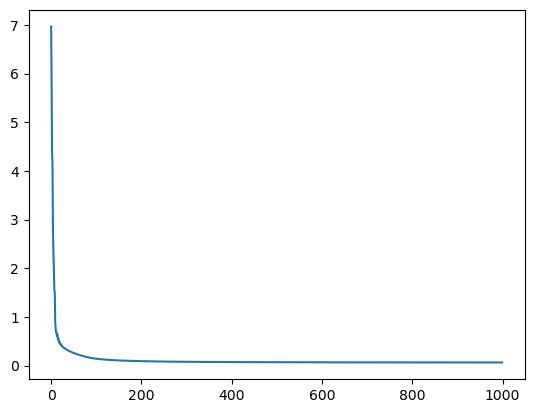

In [44]:
NN = NeuralNetwork() # Creating an instance of the NeuralNetwork class

losses = [] # Creating an empty list to store the loss values

for epoch in range(1000): # USing 500 epochs for training the model
    NN.train(train_features, train_labels_encoded) #Training the model using the train function with the trainning features and labels created in the One hot encoding and attribute splitting section
    probs = NN.feedForward(train_features) #Feed forward to get the output of the network
    loss = -np.mean(np.sum(train_labels_encoded * np.log(probs + 1e-8), axis=1)) #Calculating the loss using the cross entropy loss function cause it is better for multi class classification problems
    losses.append(loss) #Appending the loss value to the losses list
    print(f"Epoch {epoch}: Loss = {loss:.4f}") #Printing the loss value for each epoch to 4 decimal places

plt.plot(losses) #Plotting the loss values for each epoch

In case of loss calculation I have used Categorical Cross Entropy as it is best for classification problems.
At the begining of training the loss was above 69% but over epoch the loss was going down and after 100 epoch the loss got down to 6.2%. Which is good indication of the trainning.

Evaluation of the Model with Test dataset

In [45]:
predicted_labels, predictions = NN.predict(test_features)
true_labels = np.argmax(test_labels_encoded, axis=1) #Getting the true labels of the test features using argmax to get the index of the class with the highest value of probability in the output layer
num_classes = np.max(true_labels) + 1 #Getting the number of classes in the dataset using max function to get the maximum value of the true labels and adding 1 to it
TP = np.zeros(num_classes)#Creating an empty numpy array of zeros with the number of classes as the size of the array for True Positives
FP = np.zeros(num_classes)#Creating an empty numpy array of zeros with the number of classes as the size of the array for False Positives
FN = np.zeros(num_classes)#Creating an empty numpy array of zeros with the number of classes as the size of the array for False Negatives

for cls in range(num_classes):
    TP[cls] = np.sum((predicted_labels == cls) & (true_labels == cls))#Calculation True Positives where it predicted the correct class and the true label is also the same class
    FP[cls] = np.sum((predicted_labels == cls) & (true_labels != cls))# Calculating False Positives where it predicted the wrong class and the true label is not the same class 
    FN[cls] = np.sum((predicted_labels != cls) & (true_labels == cls))#Calculating False Negatives where it predicted the wrong class and the true label is the same class

precision = np.where((TP + FP) != 0, TP / (TP + FP), 0)#Calculating precision here if the value is 0 to avoid error we are avoiding the division by zero error using numpy where function
recall = np.where((TP + FN) != 0, TP / (TP + FN), 0)#Calculating recall here if the value is 0 to avoid error we are avoiding the division by zero error using numpy where function
f1 = np.where((precision + recall) != 0, 2 * precision * recall / (precision + recall), 0)#Calculating f1 score here if the value is 0 to avoid error we are avoiding the division by zero error using numpy where function
accuracy = np.mean(predicted_labels == true_labels)#Calculating accuracy by taking the mean of the predicted labels and true labels

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
for cls in range(num_classes):
    print(f"\nClass {cls}:")
    print(f"  Precision: {precision[cls]:.4f}")
    print(f"  Recall:    {recall[cls]:.4f}")
    print(f"  F1-Score:  {f1[cls]:.4f}")


Evaluation Metrics:
Accuracy: 0.9333

Class 0:
  Precision: 1.0000
  Recall:    0.8571
  F1-Score:  0.9231

Class 1:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Class 2:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Class 3:
  Precision: 0.8571
  Recall:    0.8571
  F1-Score:  0.8571

Class 4:
  Precision: 0.7500
  Recall:    1.0000
  F1-Score:  0.8571


In [46]:
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)#Creating an empty numpy array of zeros with the number of classes as the size of the array for confusion matrix

for true, pred in zip(true_labels, predicted_labels):#Calculating the confusion matrix by taking the true labels and predicted labels and zipping them together to get the index of the class with the highest value of probability in the output layer
    confusion_matrix[true, pred] += 1#Updating the confusion matrix by adding 1 to the index of the class with the highest value of probability in the output layer



print("\nConfusion Matrix:")
for row in range(num_classes):
    print(" ".join([f"{confusion_matrix[row, col]:4d}" for col in range(num_classes)]))


Confusion Matrix:
   6    0    0    1    0
   0    5    0    0    0
   0    0    8    0    0
   0    0    0    6    1
   0    0    0    0    3


**Breakdown Of Confussion Matrix and evaluation metrices**

Every Prediction level was correct with no false positive as precision is 100% for class 0. 1 was missclassfied to Class 3 as per Confussion Matrix

For class 1 All prediction were correct.

For class 2 it was flawless again

1 Samples predicted as class 4 from class 3. In total 6 correct prediction and 1 missclassified to class 4

In case of class 4 3 were correct predictions and 1 was false postive which came from class 3.


**Results and Analysis**:
I used different number of neurons for each hidden layer. At first I started with 2,2,2 in that case the model failed to predict Class 1 and Class 2 completely. Then I used 10,8,6 in this case the model failled to predict class 3 completely. Then when I used 8,7,6 it was able to classify class 3 and class 0 perfectly but doing poor on the class 4 with only 60% precision. For class 2 and class 1 it did moderate and the model was  good with an accuracy of 93%.
It was quiet tricky to find the right amount of neurons for each layer 

**Potential Improvement**: If we could tweak the model using a lesser valur of learning rate and more epochs to train and also if we change the number of neurons in each layer the model might be able to give a better result for the dataset. Also Normalizing the data can be potential improvement for the accuracy. As it is Unbalaced data balancing out the data might cause potential improvment and avoid biasness
